# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [275]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [218]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [219]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/DABS - Python Class/FoodHub_Project/foodhub_order.csv')

In [221]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [222]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [223]:
# Write your code here
print("There are",df.shape[0],"rows and", df.shape[1], "columns present in the given data.")

There are 1898 rows and 9 columns present in the given data.


#### Observations: The dataset contains 1,898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [224]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

Data Types in the Dataset
* Integer (int64): order_id, customer_id, food_preparation_time, delivery_time
* Float (float64):  cost_of_the_order
* Object (str):  restaurant_name, cuisine_type, day_of_the_week & rating


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [225]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values hence, the missing value treatment is not required.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [226]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [227]:
#statistical summary for food prepartion time data by extracting minimum, average, and maximum values
df['food_preparation_time'].describe()
min_prep_time = df['food_preparation_time'].min()
avg_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()
#Print the results
print("Minimum preparation time:", min_prep_time)
print("Average preparation time:", avg_prep_time)
print("Maximum preparation time:", max_prep_time)

Minimum preparation time: 20
Average preparation time: 27.371970495258168
Maximum preparation time: 35


#### Observations:

Here, using the describe function we found out that:

* Minimum Preparation Time: 20 minutes
* Average Preparation Time: 27.37 minutes
* Maximum Preparation time: 35 minutes

The median (50th percentile) is 27 minutes and most order falls between 23 to 31 minutes which is also a interquartile range.


### **Question 5:** How many orders are not rated? [1 mark]

In [228]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

There are 736 orders that were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [229]:
#Order_ID
df['order_id'].nunique()

1898

Here, the total uniques oder_id is 1898.

In [230]:
#Customer_ID - Unique value
df['customer_id'].nunique()

1200

In [231]:
#Customer_ID: Value count
customer_id_value_counts = df["customer_id"].value_counts()
customer_id_value_counts.head(10)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
82041,7
65009,7
276192,7
97079,6


**Observations:**

The total unique customer_id is 1,200. And since we carried out the value count, it shows the top 10 customer by order count.

* Customer_ID 52832 made 13 orders
* Customer_ID 47440 made 10 orders
* Customer_ID 83287 made 9 orders
* Customer_ID 250494 made 8 orders
* Several customer_ids made 6-7 orders

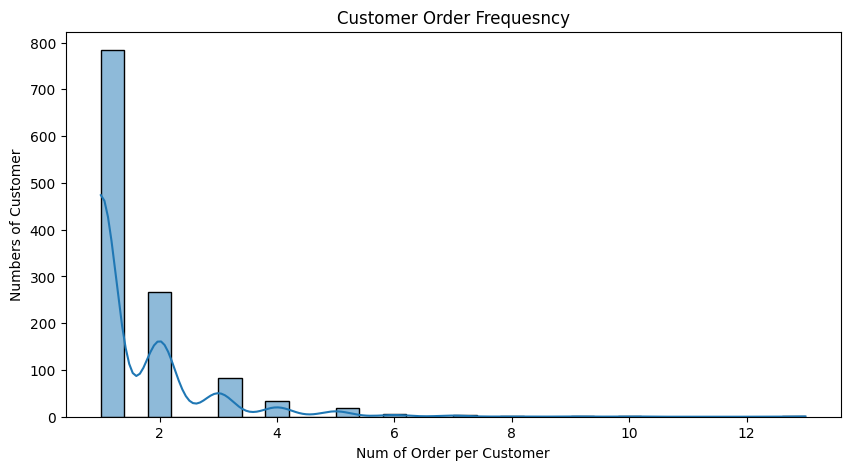

In [232]:
#Now let's plot customer_id using histogram
plt.figure(figsize=(10, 5))
sns.histplot(customer_id_value_counts, bins=30, kde=True)
plt.title("Customer Order Frequesncy")
plt.xlabel("Num of Order per Customer")
plt.ylabel("Numbers of Customer")
plt.show()

**Observatrion:**

I have used a histogram. It shows that most customers place a small numbers of orders. The distribution is right-skewed, indicating that a few customers order frequently. Additionally, the KDE provides a clear visual tren of the order frequncy.

In [233]:
#Restaurant_name: Unique value
df['restaurant_name'].nunique()


178

In [234]:
#Restaurant_name: value count
restaurant_value_counts = df["restaurant_name"].value_counts()
restaurant_value_counts.head(10)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


**Observations:**

* The total Unique Restaurants are 178.
* And the value_counts() function gives us the top 10 restaurant by order count.


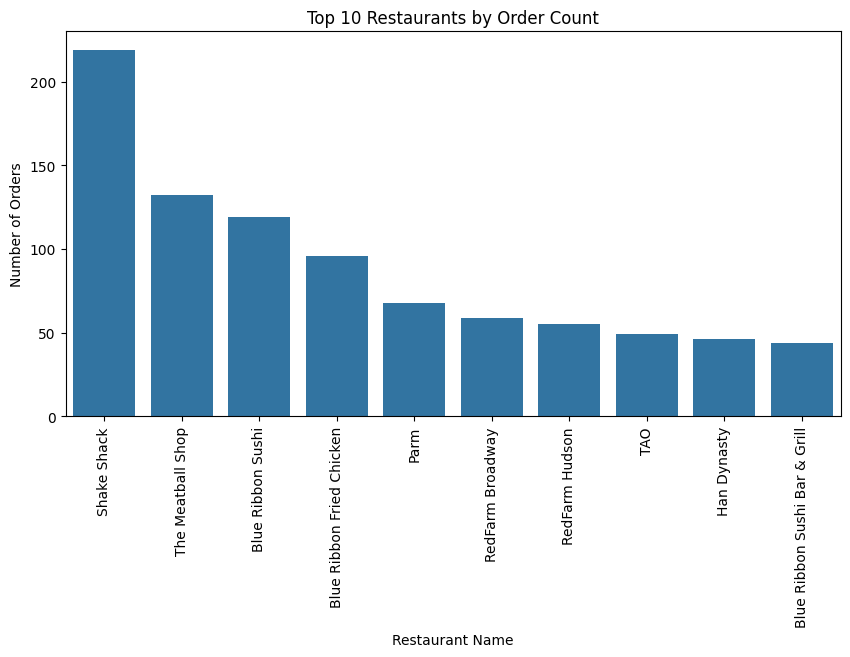

In [235]:
#Let's plot for the top 10 restaurants by order count
plt.figure(figsize=(10, 5))
sns.barplot(x=restaurant_value_counts.head(10).index, y=restaurant_value_counts.head(10).values)
plt.title("Top 10 Restaurants by Order Count")
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.show()

**Observations:**

I used barplot() instead of countplot() because restaurant_name has 178 unique values, and using countplot() would make the visualization too cluttered. The barplot() allows us to highlight the top 10 restaurants, making the chart clearer, more readable, and better suited for large categories by focusing on the most relevant data.

From the analysis, Shake Shack received the highest number of orders (219), followed by other popular restaurants like The Meatball Shop, Blue Ribbon Sushi, and Parm. The trend suggests that a few restaurants receive significantly more orders than the rest, indicating a concentration of demand among top-performing restaurants.

In [236]:
#Cuisine_Type:Unique Value
df['cuisine_type'].nunique()

14

In [237]:
#Cuisine_Type: value_count
cuisine_value_counts = df["cuisine_type"].value_counts()
cuisine_value_counts

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


**Observations:**

There are total of 14 cuisine types, and the value_counts() function provides the distribution of orders across these cuisines.


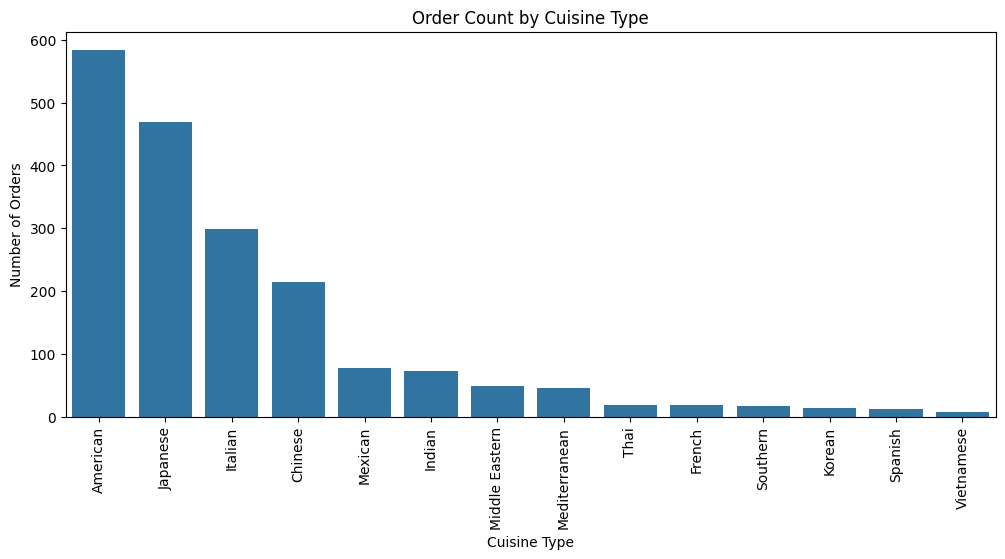

In [238]:
#Let's plot for the cuisine types
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='cuisine_type', order=cuisine_value_counts.index)
plt.title("Order Count by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.show()

**Observation:**

I have used countplot() here since it has only 14 unique values, the plot remains clear and readable.

From the analysis it shows that:
* The American cuisine has the highest orders, followed by Japanese, Italian, and chinese.

* Mexican, Indian, and Middle Eastern have moderate demand.

* Thai, French, Southern, Korean, Spanish, and Vitnamese recieve fewer orders, indicating that a few cuisines dominate customer preferences while others have lower demand.

In [239]:
#Cost_of_the_Order: Let's do the statistical summary, histplot, & boxplot analysis for this
df['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


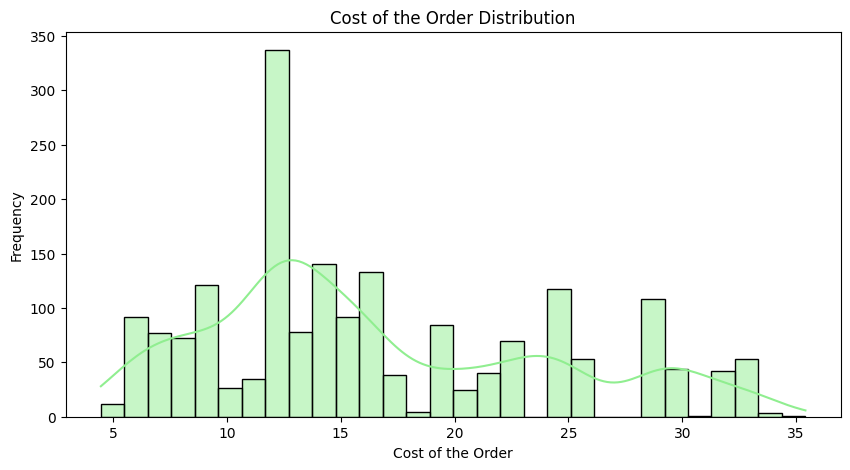

In [240]:
#histplot for cost of the order
plt.figure(figsize=(10, 5))
sns.histplot(df['cost_of_the_order'], bins=30, kde=True, color='lightgreen')
plt.title("Cost of the Order Distribution")
plt.xlabel("Cost of the Order")
plt.ylabel("Frequency")
plt.show()

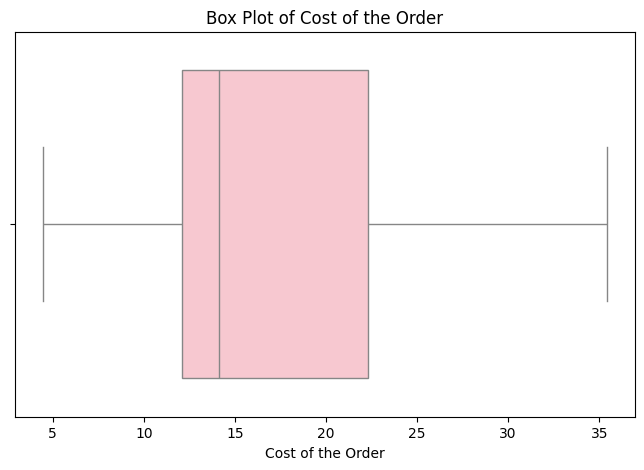

In [241]:
#boxplot for the cost of the order
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cost_of_the_order'], color="pink")
plt.title("Box Plot of Cost of the Order")
plt.xlabel("Cost of the Order")
plt.show()

**Observation:**

1. Statistical Summary: The average order cost is `$16.50`, with most orders ranging between `$12.08` (25th percentile) and `$22.30` (75th percentile). The median cost is `$14.14`, while the minimum and maximum order costs are `$4.47` and `$35.41`, respectively.

2. Histogram: The distribution is right-skewed, indicating that most orders costs betweem `$10` and `$20`, with fewer higher cost orders. The KDE curve highlightes the trend, showing the higher order costs are less frequent.

3. Box Plot: It highlights a median order cost of `$14`, with some high cost outliers above `$30`, suggesting that while most customer prefer moderately prices orders.

In [242]:
#day_of_the_week: Unique values
df['day_of_the_week'].nunique()

2

In [243]:
#day_of_the_week: value_counts
day_value_counts = df["day_of_the_week"].value_counts()
day_value_counts

,count
day_of_the_week,
Weekend,1351
Weekday,547


**Observations:**

There are 2 total unique values, with the order distribution as Weekend ordes: 1,351 & Weekday orders: 547, based on value_count()

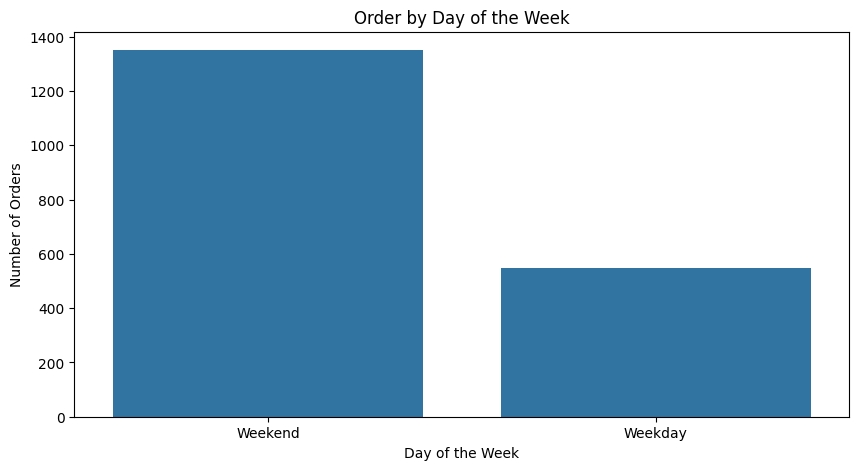

In [244]:
#let's use countplot for the orders by day of the week
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_the_week', order=day_value_counts.index)
plt.title("Order by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()

**Observations:**

I used a countplot, which indicates that significantly more orders are placed on weekends than weekdays. The higher weekend demand is likely due to people dining out or ordering in more. On weekdays, lower orders may be influenced by office/school hours, with a preference for home-cooked meals.

In [245]:
#Rating: Unique Value
df['rating'].nunique()

4

In [246]:
#Rating: Value_counts; we have previously done this but lets do it here again
rating_value_counts = df["rating"].value_counts()
rating_value_counts

,count
rating,
Not given,736
5,588
4,386
3,188


**Observations:**

There are a total of 4 unique values, and value_counts() shows the distribution, showing the number of not-rated orders along with reviews ranging from 5 stars to 3 stars.

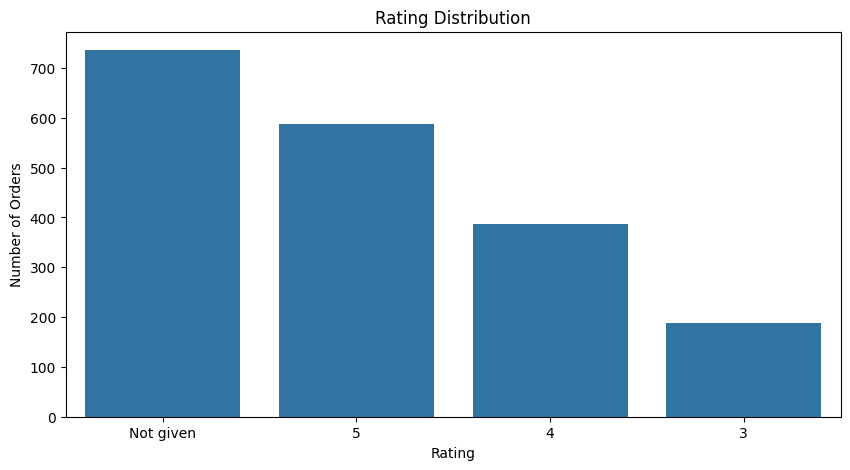

In [247]:
#Count plot for ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=rating_value_counts.index)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Orders")
plt.show()

**Observations:**

The above countplot() shows that there are 736 numbers of orders that have no rating, indicating that many customers choose not to leave feedback. Among rated orders , 5-star ratings are the most common and were provided by 588 customers, 4-star ratinges from 386 and 3-start ratings from 188 customers.

In [248]:
#Food_Prep_Time: Let's do the statistical summary, histplot, & boxplot analysis for this
#Statisctical Summary
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


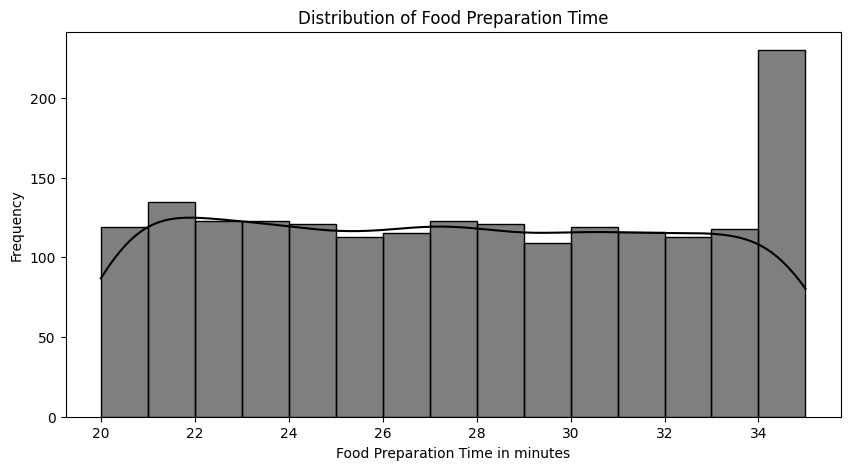

In [249]:
#histplot for the food_prep_time
plt.figure(figsize=(10, 5))
sns.histplot(df['food_preparation_time'], bins=15, kde=True, color='black')
plt.title("Distribution of Food Preparation Time")
plt.xlabel("Food Preparation Time in minutes")
plt.ylabel("Frequency")
plt.show()

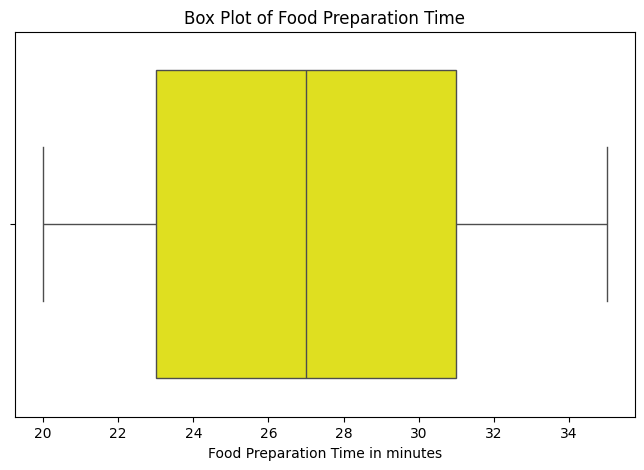

In [250]:
#boxplot for food_prep_time
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['food_preparation_time'], color="yellow")
plt.title("Box Plot of Food Preparation Time")
plt.xlabel("Food Preparation Time in minutes")
plt.show()

**Observations:**

1. Statistical Summary:
    * Average (mean) prep time is 27.37 minutes
    * Minimum & Maximum Time: 20 minutes to 35 minutes
    * Median (50th percentile): 27 minutes
    * IQR: Btween 23 minutes (25th percentile) & 31 minutes (75th percentile)

2. Histogram: It is uniform distribution. The max prep time fall between 20 - 35 minutes.

3. Boxplot: here, we can see that the median prep time is 27 minutes and most orders are prepared within 23 to 31 minutes. No outliers which means the food prep time is consistent throughout.

In [251]:
#Food_Delivery_Time: Let's do the statistical summary, histplot, & boxplot analysis for this
#Statisctical Summary
df['delivery_time'].describe()

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


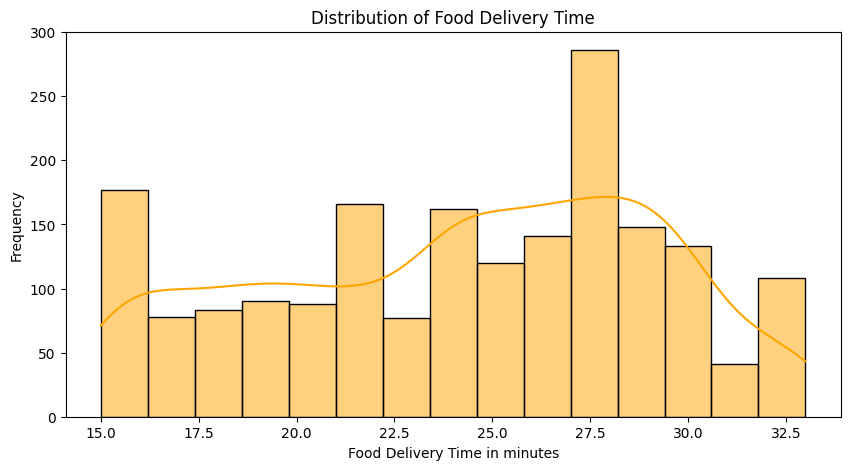

In [252]:
#Hhistplot for the food delivery time
plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_time'], bins=15, kde=True, color='orange')
plt.title("Distribution of Food Delivery Time")
plt.xlabel("Food Delivery Time in minutes")
plt.ylabel("Frequency")
plt.show()

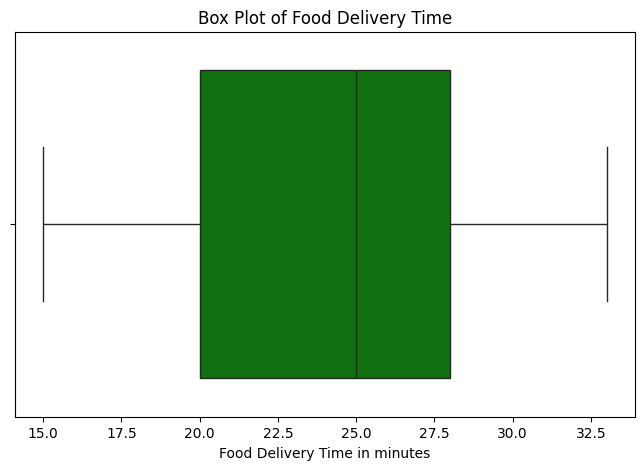

In [253]:
#boxplot for food delivery time
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['delivery_time'], color="green")
plt.title("Box Plot of Food Delivery Time")
plt.xlabel("Food Delivery Time in minutes")
plt.show()

**Observations:**

1. Statistical Summary:
    * Average (mean) prep time is 24.16 minutes
    * Minimum & Maximum Time: 15 minutes to 33 minutes
    * Median (50th percentile): 25 minutes
    * IQR: Btween 20 minutes (25th percentile) & 28 minutes (75th percentile)

2. Histogram: The distribution is spread between 15 to 33 minutes with the most between 25-28 minutes. The KDE shows the most deliveries around 24 minutes

3. Boxplot: here, we can see that the median delivery time is 25 minutes indicating slightly left-skewed and most deliveries occur between 20 to 28 minutes. No significant outliers which means it's fairly consistent.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [254]:
# Using Value_count() function to find the top 5 restaurants in terms of the number of order recieved.
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


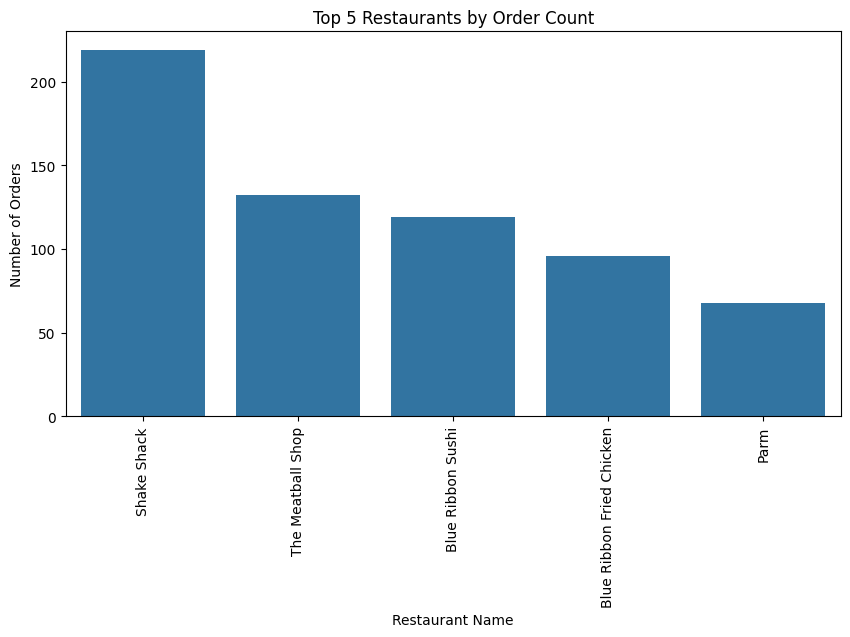

In [255]:
#Using Countplot for the visuals
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts().head(5).index)
plt.title("Top 5 Restaurants by Order Count")
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.show()

#### Observations:

I have used the value_counts().head() functions to list the top 5 restaurants and used the countplot to show some visible insights as well.

* Shake Shack dominates with the highest number of orders that being 219 and indicating strong customer preference.

* The Meatball Shop - 132 orders and Blue Ribbon Sushi - 119 orders also receive a high volume of orders, showing consistent demand.

* Similary the Blue Ribbion and Pam recieves 96 and 68 orders respectively.




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [256]:
# Lets see the data for weeekends only
weekend_data = df[df['day_of_the_week'] == 'Weekend']
weekend_cuisine_counts = weekend_data['cuisine_type'].value_counts()
weekend_cuisine_counts

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


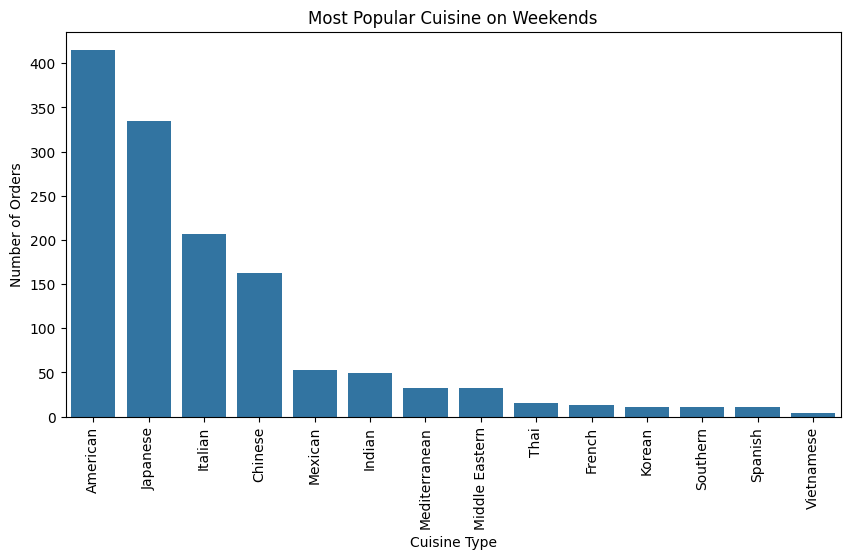

In [257]:
#plotting the most popular cuisine during weekends
plt.figure(figsize=(10, 5))
sns.barplot(x=weekend_cuisine_counts.index, y=weekend_cuisine_counts.values)
plt.title("Most Popular Cuisine on Weekends")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.show()

#### Observations:

The most popular cuisine on weekends is **American cuisine**, with **415 orders**. Seems like it is highliy preferred on weekends. This aligns with Shake Shack and Blue Ribbon Fried Chicken being the most ordered restaurants.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [258]:
# calculating percentage
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100
print("The total number of orders greater than 20 dollars is: ", orders_above_20)
print("The total number of orders is: ", total_orders)
print("The percentage of orders above 20 dollars is: ", percentage_above_20)

The total number of orders greater than 20 dollars is:  555
The total number of orders is:  1898
The percentage of orders above 20 dollars is:  29.24130663856691


#### Observations:

The output can be used as the observation. The percentage of the orders that costs more than 20 dollars is **29.24%**


### **Question 10**: What is the mean order delivery time? [1 mark]

In [259]:
# calculateing mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print("The mean delivery time is: ", mean_delivery_time)

The mean delivery time is:  24.161749209694417


#### Observations:

The average or mean delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [260]:
# To find first 3 most frequest customers
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

The top 3 most frequent customers for 20% discount vouschers are:

* Customer_ID: 52832 - 18 orders
* Customer_ID: 47440 - 10 orders
* Customer_ID: 83287 - 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Here, I will explore the following variable pairs or corelation for plotting.

1. food_preparation_time vs delivery_time
2. cost_of_the_order vs cuisine_type
3. food_preparation_time vs cuisine_type
4. restaurant_name vs rating
5. rating vs delivery_time
6. rating vs cost_of_the_orders
7. day_of_the_week vs delivery_time
8. cost_of_the_order vs food_preparation_time
9. **Heatmap:** order_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time, only numerical features for correlation analysis
10. **Pair Plot:** cost_of_the_order, food_preparation_time, delivery_time, rating

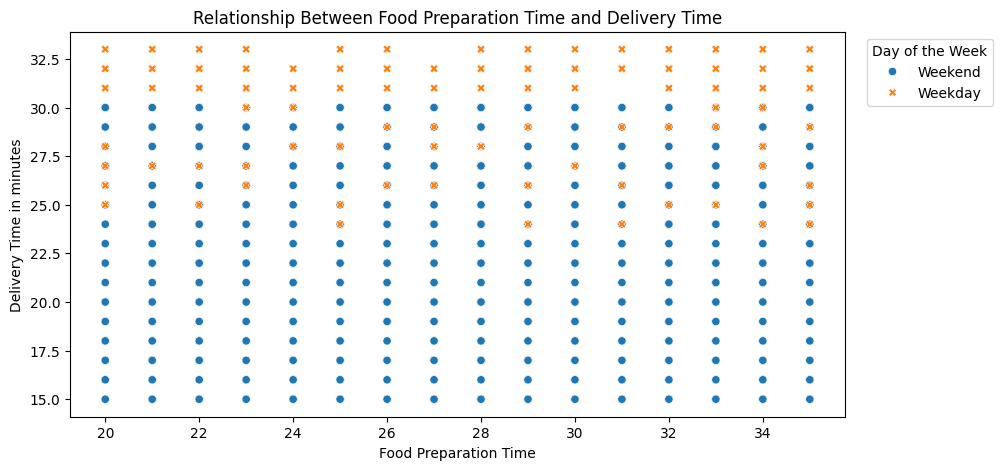

In [261]:
#1 food_preparation_time vs delivery_time using scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', hue='day_of_the_week', style='day_of_the_week')
plt.title("Relationship Between Food Preparation Time and Delivery Time")
plt.xlabel("Food Preparation Time")
plt.ylabel("Delivery Time in minutes")
##Since the placement was in the middle of the graph, I used this command to position the legend in the top right corner.
plt.legend(title="Day of the Week", bbox_to_anchor=(1.2,1), loc ="upper right")
plt.show()

**Observation:**

The scatter plot for Food Preparation Time vs. Delivery Time shows how food prep time impacts the delivery time. The plot reading shows that weekdays deliverires generally take longer than weekend ones. Also the food prep time impacts delivery time on both weekdays and weekends, but delays are more noticeable on weekdays.

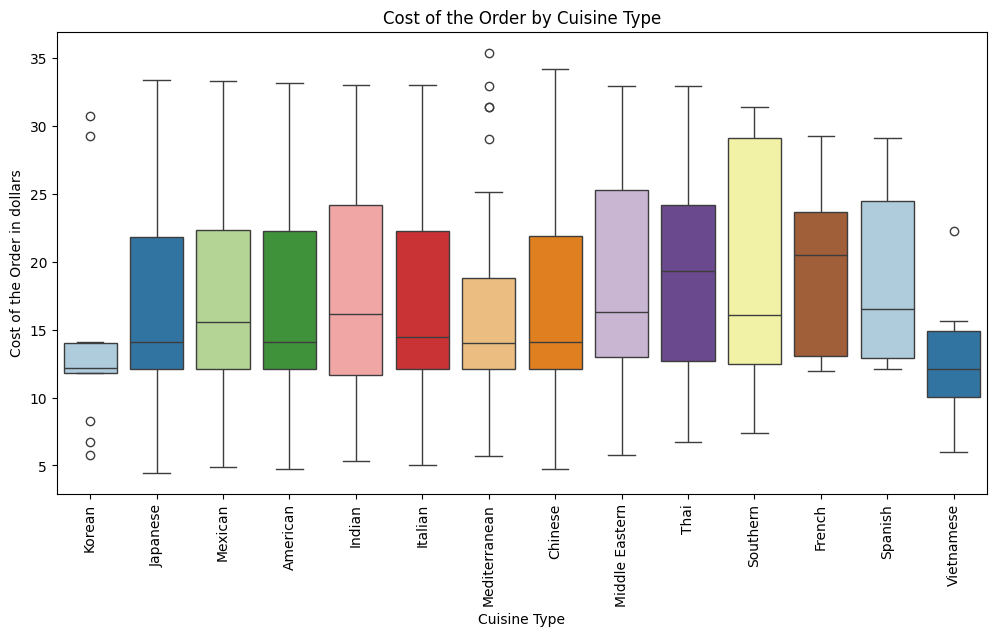

In [262]:
#2 cost_of_the_order vs cuisine_type using box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue="cuisine_type", palette="Paired")
plt.title("Cost of the Order by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the Order in dollars")
plt.xticks(rotation=90)
plt.show()

**Obervations:**

We can see how order costs vary across different cuisine types.

* Japanese and Korean Cuisines tend to have higher median costs indicating that they have higher priced menue.

* Whereas American, Indian, Chinese, and Mexican Cuisines shows wide range of order costs indicating a mix of both lower priced and higher priced options.


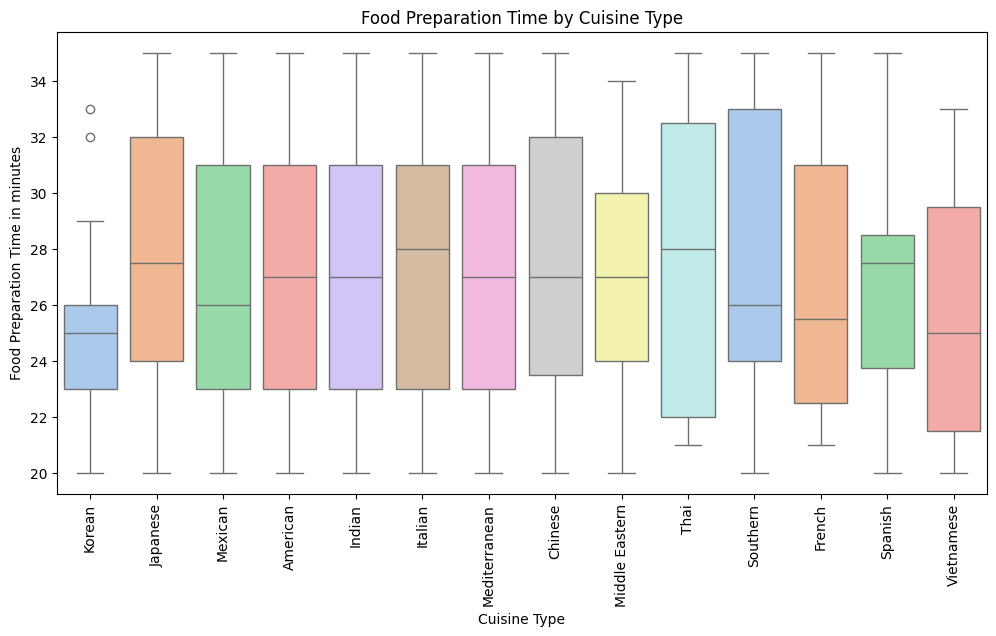

In [263]:
#3 food_preparation_time vs. cuisine_type using box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue="cuisine_type", palette="pastel")
plt.title("Food Preparation Time by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Food Preparation Time in minutes")
plt.xticks(rotation=90)
plt.show()

**Observation:**

Here, some cuisine takes significantly longer to prepare which are Japanese, CHinese, Soutehrn and so on. In Korean Cuisine we can see some outliers. The plot suggests that fast-prep cuisines such as Mexican and American have lower median food prep time.

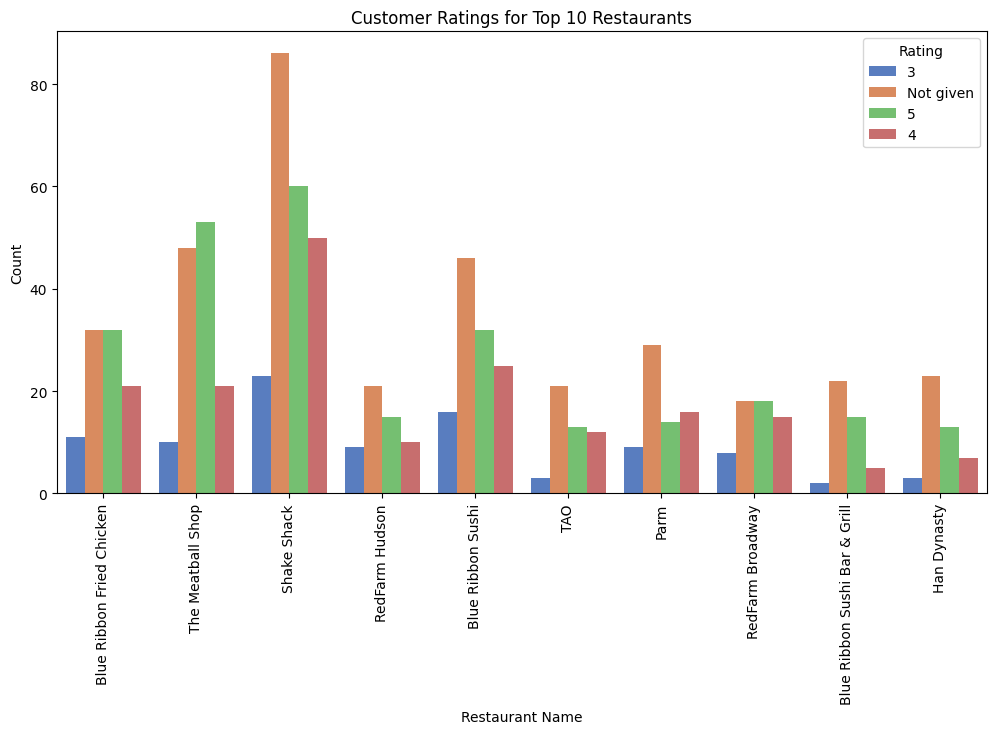

In [264]:
#4 restaurant_name vs rating (top 10 restaurant) using countplot
top_10_restaurants = df['restaurant_name'].value_counts().head(10).index
df_rated = df[df["restaurant_name"].isin(top_10_restaurants)]

#lets plot
plt.figure(figsize=(12,6))
sns.countplot(data=df_rated, x='restaurant_name', hue='rating', palette="muted")
plt.legend(title="Rating")
plt.title("Customer Ratings for Top 10 Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Observations:**

Here, the insight that we can gather is that some restaurants recieve more high ratings, while others show more mixed or lower ratings. Few restaurants have a high number of "Not Give: ratings, possibly due to low customer engagement with reviews.

Some measurable insights:

* Blue Ribbon Fried Chicken: It has high number of 5-start ratings for 32 order and the other 32 orders have "Not Given" rating.

* Shake Shack: It has high number of 5-start ratings for 60 ordes and "Not Given" rating for 80+ orders.

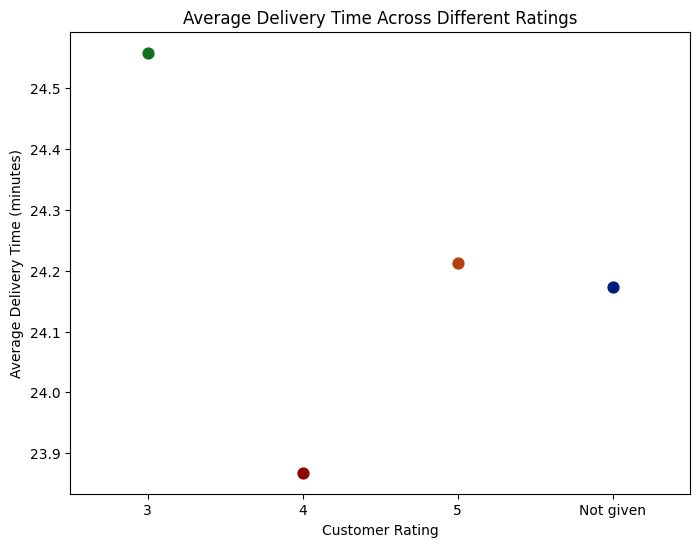

In [265]:
#5 rating vs delivery_time using pointplot

# Ensuring the order of x-axis
rating_order = ["3", "4", "5", "Not given"]
#using pointplot
plt.figure(figsize=(8,6))
sns.pointplot(x="rating", y="delivery_time", data=df, estimator=np.mean, hue='rating', palette="dark", errorbar=None, order=rating_order)
plt.xlabel("Customer Rating")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Average Delivery Time Across Different Ratings")
plt.show()

**Observations:**

The pointplot indicates that the order with 3- stars rating tend to have longer avaerage delivery time indicating that delays negatively impacts the customer satisfaction. Whereas, 5-star ratings shows faster deliveries indicating the importance of timnely service.

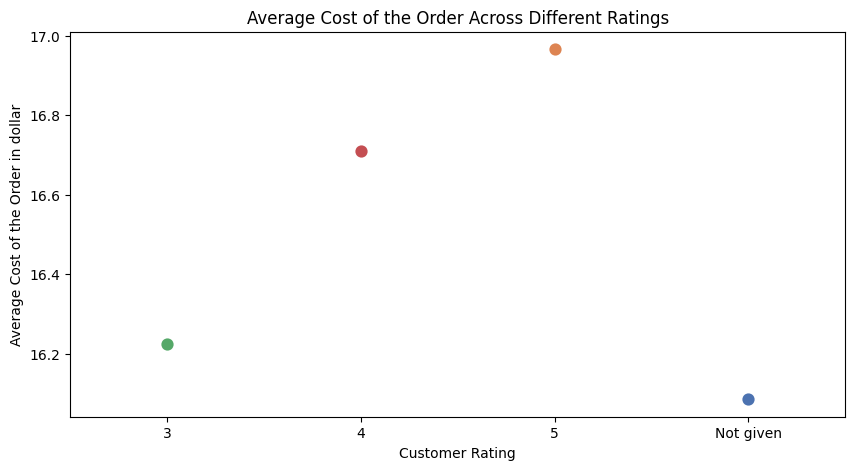

In [266]:
#6 rating vs cost_of_the_orders using pointplot

# Ensuring the order of x-axis
rating_order = ["3", "4", "5", "Not given"]
# using pointplot
plt.figure(figsize=(10,5))
sns.pointplot(x="rating", y="cost_of_the_order", data=df, estimator=np.mean, hue='rating', palette="deep", errorbar=None, order=rating_order)
plt.xlabel("Customer Rating")
plt.ylabel("Average Cost of the Order in dollar")
plt.title("Average Cost of the Order Across Different Ratings")
plt.show()


**Observations:**

The pointplot indicates that the higher ratings (5-star) are associated with slightly hgigher average order costs, suggestibg that customers spending more may have better experience.

The lower-rated orders that are 3-star rating tend to have lower average costs, indicating that it could be due to food quality, portion size or delivery speed.

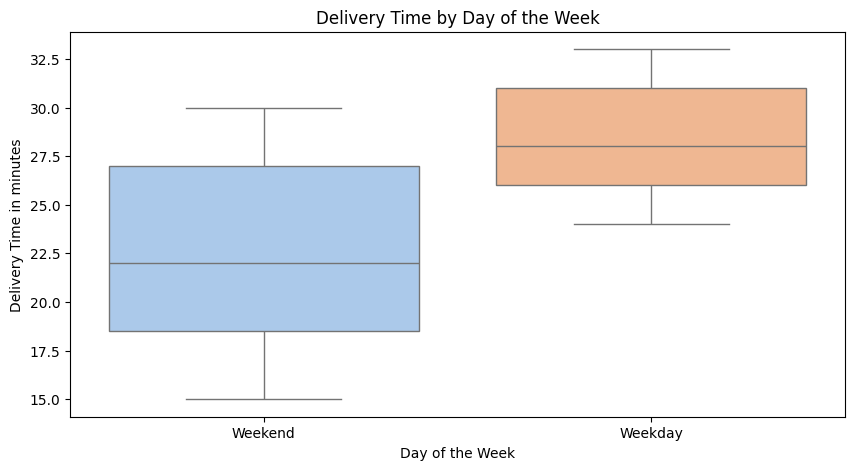

In [267]:
#7 day_of_the_week vs delivery_time using box plot
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', palette="pastel")
plt.title("Delivery Time by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time in minutes")
plt.show()

**Observations:**

Here, the abvove plot indicates that the weekdays have a higher median delivery time compared to weekends. There is more variability in delivery time on weekdays possibly due to traffic (rush hours), higher order volumes and so on.

Weekend shows lower and more consistent deliver times suggesting smoother operations.

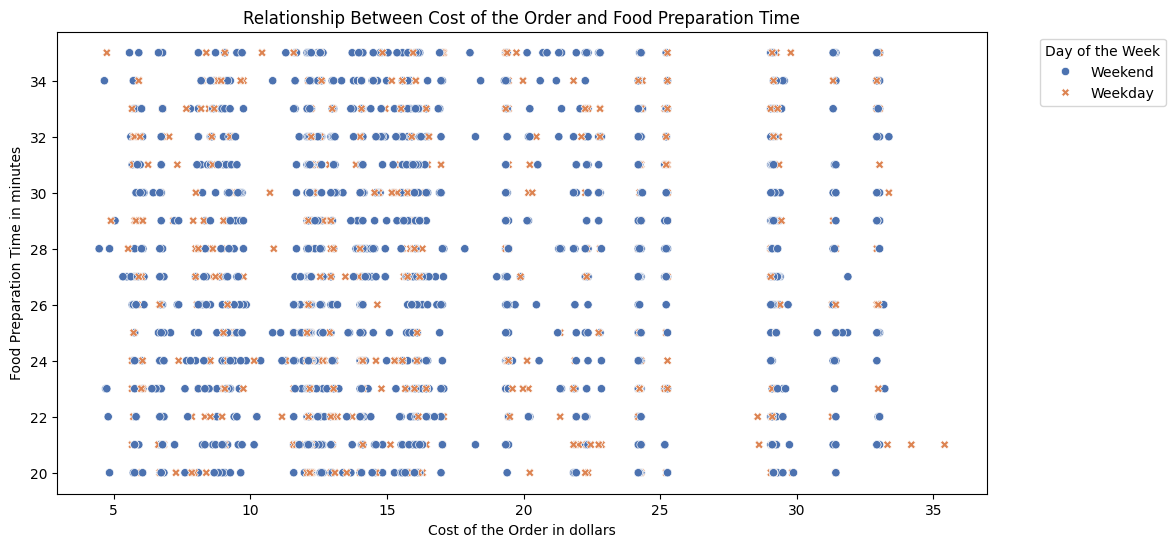

In [268]:
#8. cost_of_the_order vs food_preparation_time using scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='cost_of_the_order', y='food_preparation_time', hue='day_of_the_week', palette='deep', style='day_of_the_week')
plt.title("Relationship Between Cost of the Order and Food Preparation Time")
plt.xlabel("Cost of the Order in dollars")
plt.ylabel("Food Preparation Time in minutes")
plt.legend(title="Day of the Week", bbox_to_anchor=(1.2,1), loc ="upper right")
plt.show()

**Observations:**

Observing the above plot suggest there is no strong corelation between order cost and food preparation time. Some low cost order takes longer to prepare, some higher costs gets prepared quickly.

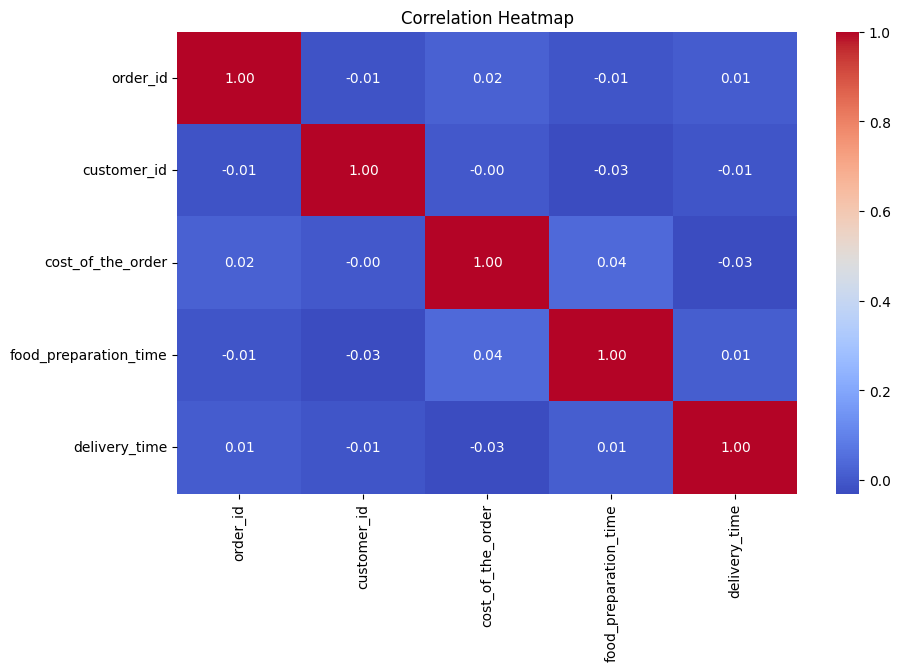

In [269]:
#9 Heatmap: order_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time, only numerical features for correlation analysis
numerical_features = ['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations:**

The order_id & cutomer_id have no meaningful correaltion here as they are identifiers.

There is no strong corelation between any numerical variables in this dataset. The highest correlation (0.041) is between cost of the order and food preparation time, but this is too weak to indicate a meaningful relationship.

Weak correlation (0.11) between cost of the order and food preparation time.

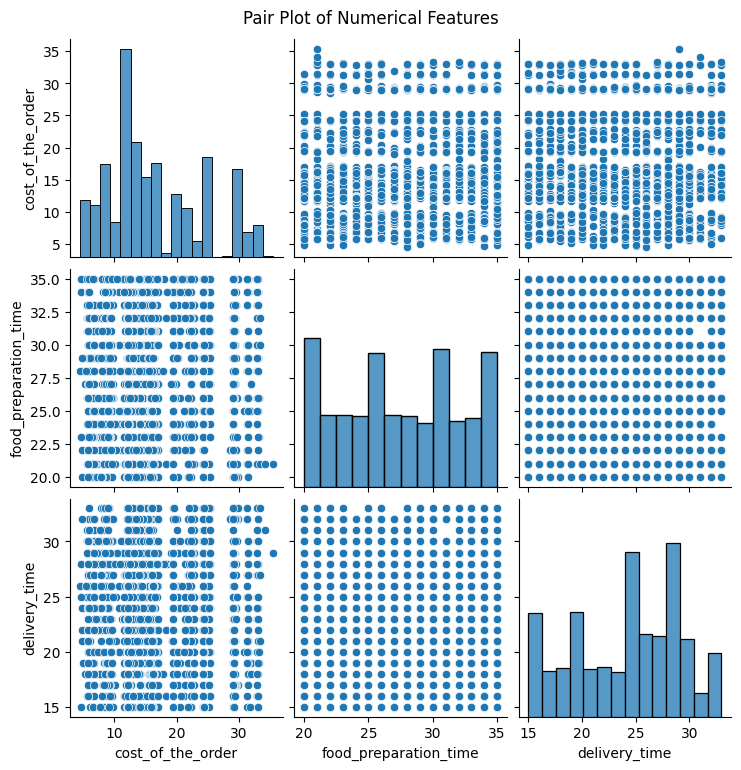

In [270]:
#10 Pair Plot: cost_of_the_order, food_preparation_time, delivery_time
numerical_features = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.pairplot(df[numerical_features], diag_kind='hist')
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

**Observations:**

There is no strong correlation between cost and food preparation time some high-cost orders are prepared quickly, while some low-cost orders take longer to prepare.

However, we observe a slightly positive trend between food preparation time and delivery time longer prep times tend to slightly increase delivery times, but the effect is not very strong.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [271]:
# let's filter the rated restaurant & convert ratings to numeric
df_rated = df.copy()
df_rated['rating'] = pd.to_numeric(df_rated['rating'], errors='coerce') #using 'coerce' to convert non-numeric values with NaN, so we can compute better.

#Let's group data by restaurant name and calculate rating count and average rating
restaurant_ratings = df_rated.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

#let's filter restaurant that have more than 50 ratings and a avg rating of 4-star
qualifying_restaurant = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

#sorting the result in ascending order
qualifying_restaurant_sorted = qualifying_restaurant.sort_values(by='count', ascending=False).reset_index()
qualifying_restaurant_sorted

,restaurant_name,count,mean
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:

Here, the qualifying restaurants have high customer satisfaction, with Shake Shack having the most ratings of 133 and The Meatball Shop the highest average rating of 4.5. There could be various factors influencing the rating such as delivery time, or difference in total orders and so on.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [272]:
# We neef to define a function to calculate revenue based on orders
def calculate_revenue(x):  #x is the the order cost
    if x > 20:
        return x * 0.25 #25% commission
    elif x > 5:
        return x * 0.15 #15% commission
    else:
        return 0 #No commission for orders <= $15

#let's apply function to calculate revenue for each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

#let's calculate the total revenue generated by the company
total_revenue = df['revenue'].sum()
print("The total revenue generated by the company across all orders is: $", total_revenue, sep="")

The total revenue generated by the company across all orders is: $6166.303


#### Observations:

The company has generated the net revenue of `$6166.3` based on commission rates.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [273]:
# let's calculate the total time required for delivery(food prep time and delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

#let's analyze the count of order that takes more than 60 mins
orders_above_60 = df[df['total_delivery_time'] > 60].shape[0]
total_orders = df.shape[0]

#Now we nee to find % of order taking more than 60 mins
percentage_above_60 = (orders_above_60 / total_orders) * 100

#Let's print the result
print("The total number of orders that take more than 60 minutes to get delivered is: ", orders_above_60)
print("The total number of orders is: ", total_orders)
print("The percentage of orders that take more than 60 minutes to get delivered is: ", percentage_above_60, '%',sep="")

The total number of orders that take more than 60 minutes to get delivered is:  200
The total number of orders is:  1898
The percentage of orders that take more than 60 minutes to get delivered is: 10.537407797681771%


#### Observations:

The percentage of orders that take more than 60 minutes (including both preparation and delivery time) is 10.54%. This could be due to large volumes of orders or longer food prep time.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [274]:
#let's calculate the mean delivery time for weekdays and weekends by using groupby()
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].agg(['mean'])
mean_delivery_time

,mean
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

* The average delivery time on weekdays is approximately 28.34 minutes.
* The average delivery time on weekends is approximately 22.47 minutes.

Form here we can see that the delivery time on weekends are slightly faster than that of the weekdays possibly due to lesser traffic, or fewer total orders.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Weekday deliveries take longer  - avg: 28.34 minutes, than weekend deliveries - avg: 22.47 minutes. This may be because of more traffic or more orders on weekdays.

* Food preparation time has a weak connection (0.011) with delivery time. This means longer cooking times do not always cause longer deliveries. Other things, like how fast the restaurant packs the food and how quickly the driver picks it up, may be more important.

* The cost of an order does not change how long it takes to cook (0.041) or how fast it is delivered (-0.03). This shows that expensive orders do not get faster service.

* 736 orders have "Not Given" ratings, which means many customers do not leave reviews. This makes it harder to know if they were happy with their food and service.

* Some cuisines, like Japanese and Korean, have higher order costs, while American and Mexican cuisines have both cheap and expensive options.


### Recommendations:

*  Speed up weekday deliveries – Weekday deliveries take longer than weekends. Improve routes, food prep speed, and driver availability to reduce delays.

* Prioritize high-cost orders – Customers paying more may expect faster service. A priority system can help ensure high-cost orders get quicker delivery.

* Encourage customer ratings – 736 customers didn’t leave reviews, reducing feedback insights. Offering small discounts or vouchers rewards can increase customer engagement.

* Optimize slow-prep meals – As we observed earlier, longer prep times don’t always delay delivery, but restaurant efficiency is important. Finding the slowest dishes and making kitchen processes smoother can help speed up service.

* Use smart promotions – Promote high-cost cuisines (Japanese, Korean) on weekends, when customer spends more. Offer weekday discounts for budget-friendly cuisines (American, Mexican) to increase demand.

---